# Movie Recommender System Implementation in Python

In this section, we'll develop a very simple movie recommender system in Python that uses the correlation between the ratings assigned to different movies, in order to find the similarity between the movies.

The dataset that we are going to use for this problem is the MovieLens Dataset. To download the dataset, go the home page of the dataset and download the "ml-latest-small.zip" file, which contains a subset of the actual movie dataset and contains 100000 ratings for 9000 movies by 700 users.

Once you unzip the downloaded file, you will see "links.csv", "movies.csv", "ratings.csv" and "tags.csv" files, along with the "README" document. In this article, we are going to use the "movies.csv" and "ratings.csv" files.

For the scripts in this article, the unzipped "ml-latest-small" folder has been placed inside the "Datasets" folder in the "E" drive.

The first step in every data science problem is to visualize and preprocess the data. We will do the same, so let's first import the "ratings.csv" file and see what it contains. Execute the following script:



In [1]:
import numpy as np  
import pandas as pd

In [2]:
ratings_data = pd.read_csv("ratings.csv")  
ratings_data.head()  

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


You can see from the output that the "ratings.csv" file contains the userId, movieId, ratings, and timestamp attributes. Each row in the dataset corresponds to one rating. The userId column contains the ID of the user who left the rating. The movieId column contains the Id of the movie, the rating column contains the rating left by the user. Ratings can have values between 1 and 5. And finally, the timestamp refers to the time at which the user left the rating.

There is one problem with this dataset. It contains the IDs of the movies but not their titles. We'll need movie names for the movies we're recommending. The movie names are stored in the "movies.csv" file. Let's import the file and see the data it contains. Execute the following script:

In [3]:
movie_names = pd.read_csv("movies.csv")  
movie_names.head()  

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


As you can see, this dataset contains movieId, the title of the movie, and its genre. We need a dataset that contains the userId, movie title, and its ratings. We have this information in two different dataframe objects: "ratings_data" and "movie_names". To get our desired information in a single dataframe, we can merge the two dataframes objects on the movieId column since it is common between the two dataframes.

We can do this using merge() function from the Pandas library, as shown below:

In [4]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId') 

In [5]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [6]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)    2.815556
#1 Cheerleader Camp (2010)          2.777778
#Captured (2017)                    2.500000
#Horror (2015)                      2.078947
#SCREAMERS (2016)                   2.500000
Name: rating, dtype: float64

You can see that the average ratings are not sorted. Let's sort the ratings in the descending order of their average ratings:

In [7]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Faintheart (2008)                 5.0
White Tiger (1996)                5.0
Radio Unnameable (2012)           5.0
Rafter Romance (1933)             5.0
Who Killed Chea Vichea? (2010)    5.0
Name: rating, dtype: float64

The movies have now been sorted according to the ascending order of their ratings. However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

Let's now plot the total number of ratings for a movie:

In [8]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()  

title
Shawshank Redemption, The (1994)    97999
Forrest Gump (1994)                 97040
Pulp Fiction (1994)                 92406
Silence of the Lambs, The (1991)    87899
Matrix, The (1999)                  84545
Name: rating, dtype: int64

Now you can see some really good movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes. Let's create a new dataframe that contains both of these attributes.

Execute the following script to create ratings_mean_count dataframe and first add the average rating of each movie to this dataframe:

In [9]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())  


In [10]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [11]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",2.815556,225
#1 Cheerleader Camp (2010),2.777778,9
#Captured (2017),2.500000,1
#Horror (2015),2.078947,19
#SCREAMERS (2016),2.500000,1


Let's plot a histogram for the number of ratings represented by the "rating_counts" column in the above dataframe. Execute the following script:

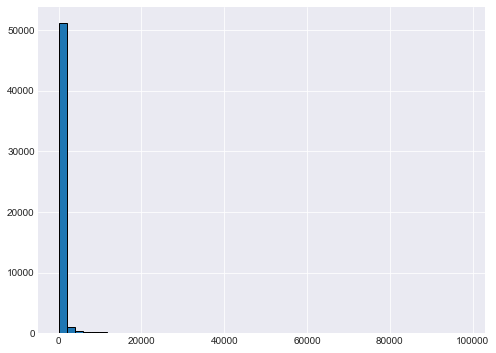

In [12]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)

From the output, you can see that most of the movies have received less than 50 ratings. While the number of movies having more than 100 ratings is very low.

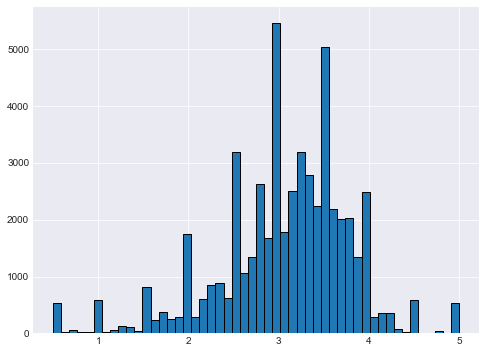

In [13]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50)  

You can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data.

Earlier, we said that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating. Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings:

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x432 with 0 Axes>

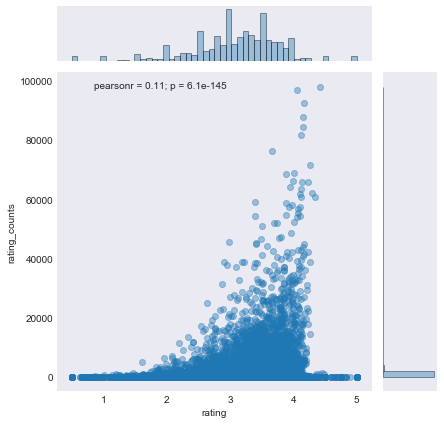

In [14]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

### Finding Similarities Between Movies

We spent quite a bit of time on visualizing and preprocessing our data. Now is the time to find the similarity between movies.

We will use the correlation between the ratings of a movie as the similarity metric. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

To create the matrix of movie titles and corresponding user ratings, execute the following script:

In [ ]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  

In [ ]:
user_movie_rating.head()  

We know that each column contains all the user ratings for a particular movie. Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

To find the user ratings for "Forrest Gump (1994)", execute the following script:

In [ ]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)'] 

The above script will return a Pandas series. Let's see how it looks.

Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between the user ratings for the "Forest Gump (1994)" and all the other movies using corrwith() function as shown below:

In [ ]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()  

In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with their correlation value, using corrwith() function. Next, we created a dataframe that contains movie title and correlation columns. We then removed all the NA values from the dataframe and displayed its first 5 rows using the head function.

In [ ]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)  


From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who watched '"Forest Gump (1994)" and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe. Execute the following script to do so:

In [ ]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head() 

In [ ]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()  

Now you can see from the output the movies that are highly correlated with "Forrest Gump (1994)". The movies in the list are some of the most famous movies Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.



Conclusion
In this article, we studied what a recommender system is and how we can create it in Python using only the Pandas library. It is important to mention that the recommender system we created is very simple. Real-life recommender systems use very complex algorithms and will be discussed in a later article.

If you want to learn more about recommender systems, I suggest checking out this very good course Building Recommender Systems with Machine Learning and AI. It goes much more in-depth and covers more complex and accurate methods than we did in this article.